In [1]:
import pandas as pd
import numpy as np
from string2string.distance import LevenshteinEditDistance
import warnings
warnings.filterwarnings("ignore")

## 1. Importing and observing data

In [2]:
df = pd.read_csv('Amzon_Google.csv', sep=";")

In [3]:
df

,Amazon,Google,Match
0,clickart 950 000 - premier image pack (dvd-rom),clickart 950000 - premier image pack (dvd-rom),1
1,noah's ark activity center (jewel case ages 3-8),the beginners bible: noah's ark activity cente...,1
2,peachtree by sage premium accounting for nonpr...,sage (ptree) - vernfp2007rt - premium accounti...,1
3,singing coach unlimited,singing coach unlimited - electronic learning ...,1
4,adobe after effects professional 6.5 upgrade f...,adobe software 22070152 after effects 6.5 pbupgrd,1
...,...,...,...
2595,shapes,aspyr media inc enemy territory: quake wars,0
2596,dragon naturally speaking standard v9,print shop deluxe 21,0
2597,mediarecover,sony media software acid pro 5 music productio...,0
2598,mediarecover,instant immersion italian 2.0,0


In [4]:
df.size

7800

In [5]:
df.duplicated().sum()

43

In [6]:
#Get list of duplicate rows based on list of column names
df2 = df[df.duplicated(keep=False)]
df2.head(10)

,Amazon,Google,Match
164,hp sp linux we 50 lic/cd 3.0c ( t3586a ),sp linux we 50 lic/cd 3.0c,1
165,hp sp linux we 50 lic/cd 3.0c ( t3586a ),sp linux we 50 lic/cd 3.0c,1
177,instant immersion 33 languages,instant immersion 33 languages,1
178,instant immersion 33 languages,instant immersion 33 languages,1
306,adobe premiere elements 3.0,adobe premiere elements 3 (pc),1
347,adobe premiere elements 3.0,adobe premiere elements 3 (pc),1
572,adobe creative suite cs3 production premium up...,production prem cs3 mac upgrad,1
574,adobe creative suite cs3 production premium up...,production prem cs3 mac upgrad,1
660,extensis smartscale 1-user ( pxe-11433 ),onone software pxe-11433 pxl smartscale elect ...,1
661,extensis smartscale 1-user ( pxe-11433 ),onone software pxe-11433 pxl smartscale elect ...,1


In [7]:
df = df.drop_duplicates()

In [8]:
df.isnull().sum()

Amazon    0
Google    0
Match     0
dtype: int64

In [9]:
df.describe()

,Match
count,2557.000000
mean,0.491592
std,0.500027
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
df["Levenshtein_dist"]=0
df["Jaccard_dist"] = 0
df["Jaro_char_dist"] = 0
df["Jaro_word_dist"] = 0

## 2 (a). Levenshtein distance (at the character level) 

In [11]:
lev_distance = LevenshteinEditDistance()
df['Levenshtein_dist']  = [lev_distance.compute(df['Amazon'], df['Google']) for _, df in df.iterrows()]

## 2 (b) Jaccard distance (at the word level)

In [12]:
from string2string.misc import Tokenizer
from string2string.distance import JaccardIndex

tokenizer = Tokenizer(word_delimiter=' ')

# Tokenize the texts in each column
df['Amazon_tokens'] = df['Amazon'].apply(lambda x: tokenizer.tokenize(x))
df['Google_tokens'] = df['Google'].apply(lambda x: tokenizer.tokenize(x))

jaccard_distance = JaccardIndex()

# Compute he Jaccard similarity scores at the word level for each pair of texts
df['Jaccard_dist'] = [jaccard_distance.compute(df['Amazon_tokens'], df['Google_tokens']) for _, df in df.iterrows()]


## 2 (c), (d). Jaro distance (at the character level). Jaro distance (at the word level) 

In [13]:
from string2string.similarity import JaroSimilarity

# Initialize JaroSimilarity
jaro_similarity = JaroSimilarity()

# Compute the Jaro similarity scores at the word level for each pair of texts
df['Jaro_word_dist'] = [jaro_similarity.compute(df['Amazon_tokens'], df['Google_tokens']) for _, df in df.iterrows()]

# Compute the Jaro similarity scores at the character level for each pair of texts
df['Jaro_char_dist'] = [jaro_similarity.compute(df['Amazon'], df['Google']) for _, df in df.iterrows()]

In [14]:
df

,Amazon,Google,Match,Levenshtein_dist,Jaccard_dist,Jaro_char_dist,Jaro_word_dist,Amazon_tokens,Google_tokens
0,clickart 950 000 - premier image pack (dvd-rom),clickart 950000 - premier image pack (dvd-rom),1,1.0,0.333333,0.913198,0.869048,"[clickart, 950, 000, -, premier, image, pack, ...","[clickart, 950000, -, premier, image, pack, (d..."
1,noah's ark activity center (jewel case ages 3-8),the beginners bible: noah's ark activity cente...,1,41.0,0.666667,0.637244,0.569444,"[noah's, ark, activity, center, (jewel, case, ...","[the, beginners, bible:, noah's, ark, activity..."
2,peachtree by sage premium accounting for nonpr...,sage (ptree) - vernfp2007rt - premium accounti...,1,23.0,0.454545,0.730042,0.783333,"[peachtree, by, sage, premium, accounting, for...","[sage, (ptree), -, vernfp2007rt, -, premium, a..."
3,singing coach unlimited,singing coach unlimited - electronic learning ...,1,31.0,0.571429,0.808642,0.809524,"[singing, coach, unlimited]","[singing, coach, unlimited, -, electronic, lea..."
4,adobe after effects professional 6.5 upgrade f...,adobe software 22070152 after effects 6.5 pbupgrd,1,58.0,0.666667,0.646110,0.657143,"[adobe, after, effects, professional, 6.5, upg...","[adobe, software, 22070152, after, effects, 6...."
...,...,...,...,...,...,...,...,...,...
2595,shapes,aspyr media inc enemy territory: quake wars,0,39.0,1.000000,0.503230,0.000000,[shapes],"[aspyr, media, inc, enemy, territory:, quake, ..."
2596,dragon naturally speaking standard v9,print shop deluxe 21,0,30.0,1.000000,0.513271,0.000000,"[dragon, naturally, speaking, standard, v9]","[print, shop, deluxe, 21]"
2597,mediarecover,sony media software acid pro 5 music productio...,0,46.0,1.000000,0.537302,0.000000,[mediarecover],"[sony, media, software, acid, pro, 5, music, p..."
2598,mediarecover,instant immersion italian 2.0,0,25.0,1.000000,0.457854,0.000000,[mediarecover],"[instant, immersion, italian, 2.0]"


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [16]:
df['Jaccard_dist'] = 1 - df['Jaccard_dist']

In [17]:
# df['Jaro_char_dist'] = 1 - df['Jaro_char_dist']
# df['Jaro_word_dist'] = 1 - df['Jaro_word_dist']

In [18]:
df

,Amazon,Google,Match,Levenshtein_dist,Jaccard_dist,Jaro_char_dist,Jaro_word_dist,Amazon_tokens,Google_tokens
0,clickart 950 000 - premier image pack (dvd-rom),clickart 950000 - premier image pack (dvd-rom),1,1.0,0.666667,0.913198,0.869048,"[clickart, 950, 000, -, premier, image, pack, ...","[clickart, 950000, -, premier, image, pack, (d..."
1,noah's ark activity center (jewel case ages 3-8),the beginners bible: noah's ark activity cente...,1,41.0,0.333333,0.637244,0.569444,"[noah's, ark, activity, center, (jewel, case, ...","[the, beginners, bible:, noah's, ark, activity..."
2,peachtree by sage premium accounting for nonpr...,sage (ptree) - vernfp2007rt - premium accounti...,1,23.0,0.545455,0.730042,0.783333,"[peachtree, by, sage, premium, accounting, for...","[sage, (ptree), -, vernfp2007rt, -, premium, a..."
3,singing coach unlimited,singing coach unlimited - electronic learning ...,1,31.0,0.428571,0.808642,0.809524,"[singing, coach, unlimited]","[singing, coach, unlimited, -, electronic, lea..."
4,adobe after effects professional 6.5 upgrade f...,adobe software 22070152 after effects 6.5 pbupgrd,1,58.0,0.333333,0.646110,0.657143,"[adobe, after, effects, professional, 6.5, upg...","[adobe, software, 22070152, after, effects, 6...."
...,...,...,...,...,...,...,...,...,...
2595,shapes,aspyr media inc enemy territory: quake wars,0,39.0,0.000000,0.503230,0.000000,[shapes],"[aspyr, media, inc, enemy, territory:, quake, ..."
2596,dragon naturally speaking standard v9,print shop deluxe 21,0,30.0,0.000000,0.513271,0.000000,"[dragon, naturally, speaking, standard, v9]","[print, shop, deluxe, 21]"
2597,mediarecover,sony media software acid pro 5 music productio...,0,46.0,0.000000,0.537302,0.000000,[mediarecover],"[sony, media, software, acid, pro, 5, music, p..."
2598,mediarecover,instant immersion italian 2.0,0,25.0,0.000000,0.457854,0.000000,[mediarecover],"[instant, immersion, italian, 2.0]"


## 3.  ROC curves for the methods above 

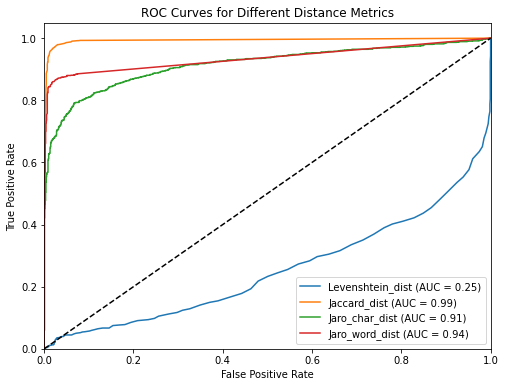

In [19]:
metrics = ['Levenshtein_dist', 'Jaccard_dist', 'Jaro_char_dist', "Jaro_word_dist"]
labels = df['Match']
# Plot ROC curves for each distance metric
plt.figure(figsize=(8, 6))
for metric in metrics:
    scores = df[metric]
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{metric} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Distance Metrics')
plt.legend(loc="lower right")
plt.show()

In [20]:
df['Levenshtein_dist'] = 1 - (df['Levenshtein_dist'] / df['Levenshtein_dist'].max())

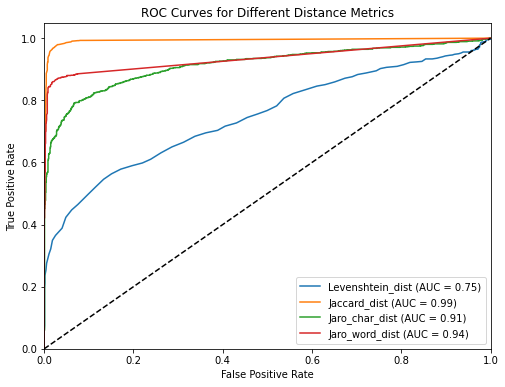

In [21]:
# Plot ROC curves for each distance metric
plt.figure(figsize=(8, 6))
for metric in metrics:
    scores = df[metric]
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{metric} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Distance Metrics')
plt.legend(loc="lower right")
plt.show()

In [37]:

max_length = [max(len(df['Amazon']), len(df['Google'])) for _, df in df.iterrows()]
    
df['Levenshtein_dist'] = (df['Levenshtein_dist'] / max_length)

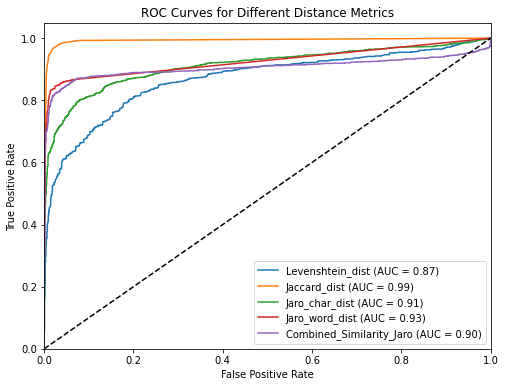

In [38]:
# Plot ROC curves for each distance metric
plt.figure(figsize=(8, 6))
for metric in metrics:
    scores = df[metric]
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{metric} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Distance Metrics')
plt.legend(loc="lower right")
plt.show()

## 5. String pre-processing that can improve results

In [24]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomiriszhaksylyk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
# This function lemmatize the given strings and remove the puncutation and remove the stopwords
def preprocess(items):
    li = []
    
    lemmas = [ wordnet_lemmatizer.lemmatize(items, pos='v')  ]
    text = ''.join(lemmas) 

    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    word =  [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    word = ' '.join(word)
    
    return word
    

In [26]:
# calling preprocess function to get the processed sentence list
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
    
wordnet_lemmatizer = WordNetLemmatizer()
df['Amazon'] = df['Amazon'].apply(preprocess)

In [27]:
df['Google'] = df['Google'].apply(preprocess)

In [28]:
lev_distance = LevenshteinEditDistance()
df['Levenshtein_dist']  = [lev_distance.compute(df['Amazon'], df['Google']) for _, df in df.iterrows()]

## 2 (b) Jaccard distance (at the word level)

tokenizer = Tokenizer(word_delimiter=' ')

# Tokenize the texts in each column
df['Amazon_tokens'] = df['Amazon'].apply(lambda x: tokenizer.tokenize(x))
df['Google_tokens'] = df['Google'].apply(lambda x: tokenizer.tokenize(x))

jaccard_distance = JaccardIndex()

# Compute the jaccard similarity scores at the word level for each pair of texts
df['Jaccard_dist'] = [jaccard_distance.compute(df['Amazon_tokens'], df['Google_tokens']) for _, df in df.iterrows()]


## 2 (c), (d). Jaro distance (at the character level). Jaro distance (at the word level) 


# Initialize JaroSimilarity
jaro_similarity = JaroSimilarity()

# Compute the Jaro similarity scores at the word level for each pair of texts
df['Jaro_word_dist'] = [jaro_similarity.compute(df['Amazon_tokens'], df['Google_tokens']) for _, df in df.iterrows()]

# Compute the Jaro similarity scores at the character level for each pair of texts
df['Jaro_char_dist'] = [jaro_similarity.compute(df['Amazon'], df['Google']) for _, df in df.iterrows()]

df['Jaccard_dist'] = 1 - df['Jaccard_dist']

# df['Jaro_char_dist'] = 1 - df['Jaro_char_dist']
# df['Jaro_word_dist'] = 1 - df['Jaro_word_dist']

max_length = [max(len(df['Amazon']), len(df['Google'])) for _, df in df.iterrows()]
    
df['Levenshtein_dist'] = 1- (df['Levenshtein_dist'] / max_length)


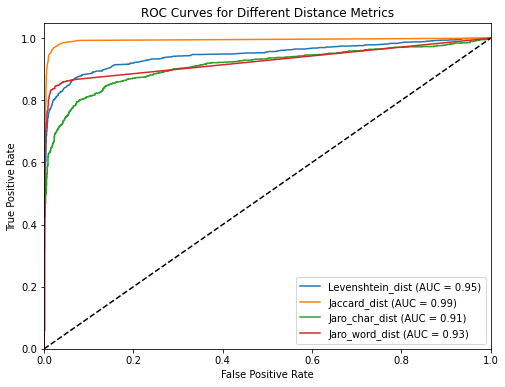

In [29]:

# Plot ROC curves for each distance metric
plt.figure(figsize=(8, 6))
for metric in metrics:
    scores = df[metric]
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{metric} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Distance Metrics')
plt.legend(loc="lower right")
plt.show()

## 6. Combination of character- and word-level distances that can improve results

In [30]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomiriszhaksylyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
lev_distance = LevenshteinEditDistance()
df['Levenshtein_dist']  = [lev_distance.compute(df['Amazon'], df['Google']) for _, df in df.iterrows()]

## 2 (b) Jaccard distance (at the word level)

tokenizer = Tokenizer(word_delimiter=' ')

# Tokenize the texts in each column
df['Amazon_tokens'] = df['Amazon'].apply(lambda x: tokenizer.tokenize(x))
df['Google_tokens'] = df['Google'].apply(lambda x: tokenizer.tokenize(x))

jaccard_distance = JaccardIndex()

# Compute the jaccard similarity scores at the word level for each pair of texts
df['Jaccard_dist'] = [jaccard_distance.compute(df['Amazon_tokens'], df['Google_tokens']) for _, df in df.iterrows()]

df['Jaccard_dist'] = 1 - df['Jaccard_dist']

# df['Jaro_char_dist'] = 1 - df['Jaro_char_dist']
# df['Jaro_word_dist'] = 1 - df['Jaro_word_dist']

max_length = [max(len(df['Amazon']), len(df['Google'])) for _, df in df.iterrows()]
    
df['Levenshtein_dist'] = 1- (df['Levenshtein_dist'] / max_length)

# Define weights for character-level and word-level distances
weight_char = 0.3
weight_word = 0.7

# Combine distances with weighted average
df['Combined_Similarity_Lev+Jac'] = (weight_char * (1 - df['Levenshtein_dist']) + weight_word * df['Jaccard_dist']) / (weight_char + weight_word)


In [40]:
metrics = ['Levenshtein_dist', 'Jaccard_dist', 'Jaro_char_dist', "Jaro_word_dist", 'Combined_Similarity']
labels = df['Match']

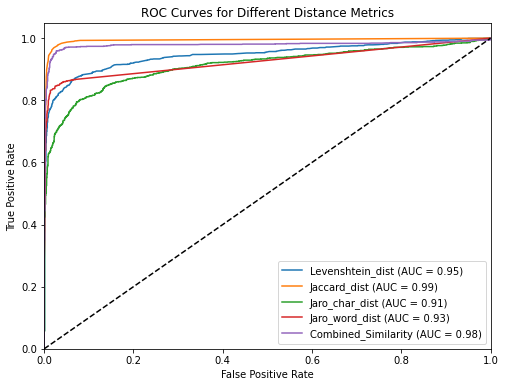

In [33]:
# Plot ROC curves for each distance metric
plt.figure(figsize=(8, 6))
for metric in metrics:
    scores = df[metric]
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{metric} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Distance Metrics')
plt.legend(loc="lower right")
plt.show()

In [41]:

## 2 (c), (d). Jaro distance (at the character level). Jaro distance (at the word level) 


# Initialize JaroSimilarity
jaro_similarity = JaroSimilarity()

# Compute the Jaro similarity scores at the word level for each pair of texts
df['Jaro_word_dist'] = [jaro_similarity.compute(df['Amazon_tokens'], df['Google_tokens']) for _, df in df.iterrows()]

# Compute the Jaro similarity scores at the character level for each pair of texts
df['Jaro_char_dist'] = [jaro_similarity.compute(df['Amazon'], df['Google']) for _, df in df.iterrows()]

# df['Jaro_char_dist'] = 1 - df['Jaro_char_dist']
# df['Jaro_word_dist'] = 1 - df['Jaro_word_dist']

# Define weights for character-level and word-level distances
weight_char = 0.3
weight_word = 0.7

# Combine distances with weighted average
df['Combined_Similarity_Jaro'] = (weight_char * (1 - df['Jaro_char_dist']) + weight_word * df['Jaro_word_dist']) / (weight_char + weight_word)


In [43]:
metrics = ['Levenshtein_dist', 'Jaccard_dist', 'Jaro_char_dist', "Jaro_word_dist","Combined_Similarity_Lev+Jac", 'Combined_Similarity_Jaro']
labels = df['Match']

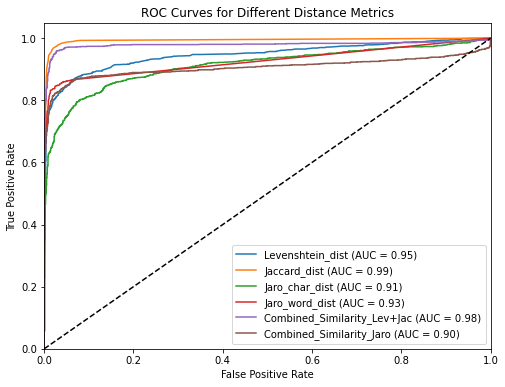

In [44]:
# Plot ROC curves for each distance metric
plt.figure(figsize=(8, 6))
for metric in metrics:
    scores = df[metric]
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{metric} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Distance Metrics')
plt.legend(loc="lower right")
plt.show()

In [56]:
lev_distance = LevenshteinEditDistance()
df['Levenshtein_dist']  = [lev_distance.compute(df['Amazon'], df['Google']) for _, df in df.iterrows()]

## 2 (b) Jaccard distance (at the word level)

tokenizer = Tokenizer(word_delimiter=' ')

# Tokenize the texts in each column
df['Amazon_tokens'] = df['Amazon'].apply(lambda x: tokenizer.tokenize(x))
df['Google_tokens'] = df['Google'].apply(lambda x: tokenizer.tokenize(x))

jaccard_distance = JaccardIndex()

# Compute the jaccard similarity scores at the word level for each pair of texts
df['Jaccard_dist'] = [jaccard_distance.compute(df['Amazon_tokens'], df['Google_tokens']) for _, df in df.iterrows()]


## 2 (c), (d). Jaro distance (at the character level). Jaro distance (at the word level) 


# Initialize JaroSimilarity
jaro_similarity = JaroSimilarity()

# Compute the Jaro similarity scores at the word level for each pair of texts
df['Jaro_word_dist'] = [jaro_similarity.compute(df['Amazon_tokens'], df['Google_tokens']) for _, df in df.iterrows()]

# Compute the Jaro similarity scores at the character level for each pair of texts
df['Jaro_char_dist'] = [jaro_similarity.compute(df['Amazon'], df['Google']) for _, df in df.iterrows()]

df['Jaccard_dist'] = 1 - df['Jaccard_dist']

# df['Jaro_char_dist'] = 1 - df['Jaro_char_dist']
# df['Jaro_word_dist'] = 1 - df['Jaro_word_dist']

max_length = [max(len(df['Amazon']), len(df['Google'])) for _, df in df.iterrows()]
    
df['Levenshtein_dist'] = 1- (df['Levenshtein_dist'] / max_length)


# Define weights for character-level and word-level distances
weight1 = 0.1
weight2 = 1
weight3 = 0.1
weight4 = 0.1
# Combine distances with weighted average
df['Combined_Similarity_Jaro'] = (weight1 * (df['Jaro_char_dist']) + weight2 * df['Jaccard_dist'] + weight3 * df['Jaro_word_dist'] + weight4 * df['Levenshtein_dist']) / (weight1 + weight2+ weight3+ weight4)


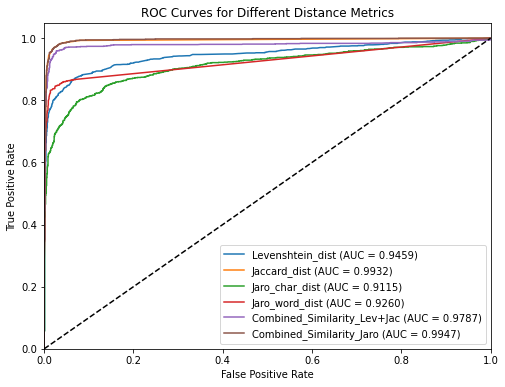

In [57]:
# Plot ROC curves for each distance metric
plt.figure(figsize=(8, 6))
for metric in metrics:
    scores = df[metric]
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{metric} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Distance Metrics')
plt.legend(loc="lower right")
plt.show()